## Creating choropleth maps for income and race in LA City

In [1]:
# import necessary libraries
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import data
neigh = gpd.read_file('NeighChange.zip')

In [3]:
# checking dataset
neigh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         155 non-null    int64   
 1   zipcode     155 non-null    object  
 2   Rank        155 non-null    int64   
 3   Neighborho  155 non-null    object  
 4   IRS_Ratio   155 non-null    float64 
 5   HH_Size     155 non-null    float64 
 6   Per_White   155 non-null    float64 
 7   Per_Colleg  155 non-null    float64 
 8   Rent        155 non-null    float64 
 9   Index_Scor  155 non-null    float64 
 10  IRS_Rati_1  155 non-null    float64 
 11  IRS_Rati_2  155 non-null    float64 
 12  HH_Incom_2  155 non-null    int64   
 13  HH_Size_20  155 non-null    float64 
 14  HH_Size_21  155 non-null    float64 
 15  Percent_Wh  155 non-null    float64 
 16  Percent__1  155 non-null    float64 
 17  College_Pe  155 non-null    float64 
 18  College__1  155 non-null    float64 
 19  

In [4]:
# subsetting columns we need
sub = ['Neighborho', 'Percent_Wh', 'MedInc4', 'geometry']

In [5]:
neigh[sub].sample(10)

,Neighborho,Percent_Wh,MedInc4,geometry
141,Mostly not LA (Glendale),0.00,0.00000,"POLYGON ((-118.25403 34.11895, -118.25150 34.1..."
144,Mostly not LA (LA Crescenta),0.00,0.00000,"MULTIPOLYGON (((-118.26681 34.23266, -118.2668..."
79,Winnetka,37.61,67451.71528,"POLYGON ((-118.56229 34.22035, -118.56230 34.2..."
7,Baldwin Hills/Crenshaw/Leimert Park,2.01,41891.99144,"POLYGON ((-118.33405 34.01737, -118.33396 34.0..."
104,Shadow Hills/Sun Valley,55.02,76730.03801,"POLYGON ((-118.34846 34.20665, -118.34847 34.2..."
100,Van Nuys/Lake Balboa,32.78,51111.19906,"POLYGON ((-118.50172 34.22669, -118.50002 34.2..."
19,Downtown,15.54,17944.87281,"POLYGON ((-118.22869 34.03856, -118.22858 34.0..."
121,Mostly not LA (Malibu),0.00,0.00000,"MULTIPOLYGON (((-118.56805 34.04324, -118.5680..."
137,Mostly not LA (South Pasadena),0.00,0.00000,"MULTIPOLYGON (((-118.15537 34.09859, -118.1553..."
71,Harbor City,26.22,58151.39623,"POLYGON ((-118.29850 33.81320, -118.29851 33.8..."


(-118.69382433079996,
 -118.12972968319995,
 33.67328619960006,
 34.36893184040008)

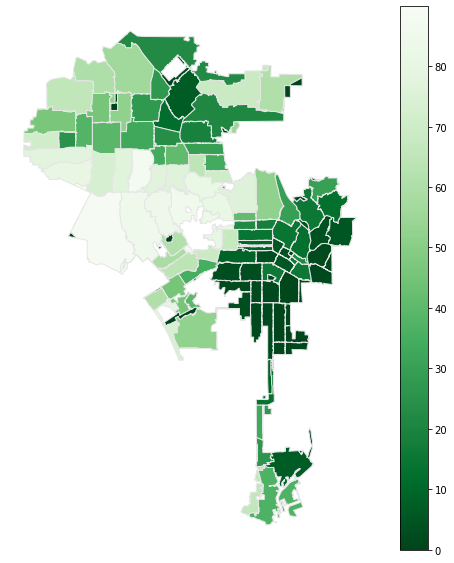

In [6]:
# choropleth of neighborhoods, race
fig, ax = plt.subplots(1, figsize=(10,10))
neigh[sub].plot(
    column='Percent_Wh',
    cmap='Greens_r',
    linewidth=1,
    ax=ax,
    edgecolor='0.9',
    legend = True)
ax.axis('off')

(-118.69382433079996,
 -118.12972968319995,
 33.67328619960006,
 34.36893184040008)

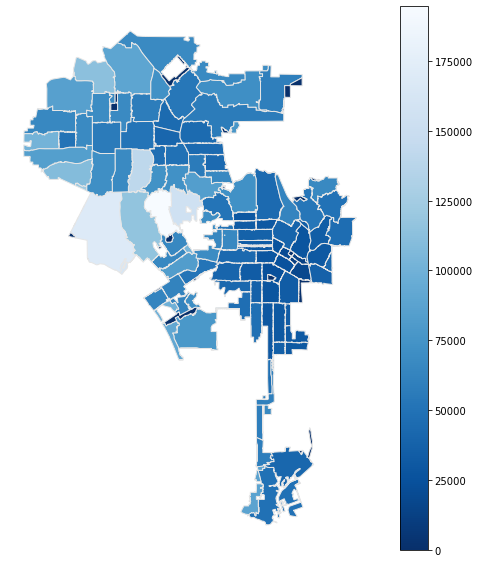

In [7]:
# choropleth of neighborhoods, income
fig, ax = plt.subplots(1, figsize=(10,10))
neigh[sub].plot(
    column='MedInc4',
    cmap='Blues_r',
    linewidth=1,
    ax=ax,
    edgecolor='0.9',
    legend = True)
ax.axis('off')